## Loss function

### Mean Squared Error

In [1]:
from sklearn.metrics import mean_squared_error

In [2]:
y_true = [0, 0, 0, 1]
y_pred = [0, 0, 0, 0]

In [3]:
mean_squared_error(y_true, y_pred)

0.25

### Binary CrossEntropy

In [4]:
import numpy as np
import tensorflow as tf

In [5]:
y_true = [0,0,1,1]
y_pred = [0,0,0,1]

In [6]:
y_pred = np.array(y_pred).astype('float')

In [7]:
bce = tf.keras.losses.BinaryCrossentropy()

In [8]:
bce(y_true, y_pred).numpy()

3.8562371730804443

### Sparse Categorical CrossEntropy
- no need 1h
- activation='softmax'

In [9]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [10]:
# สร้าง 1000 ข้อมํูล 5 กลุ่ม แต่ละกลุ่มมี 2 Features

In [11]:
X, y = make_blobs(n_samples=1000, centers=5, n_features=2, cluster_std=1.1, random_state=1)

In [12]:
X

array([[ -7.25346749,  -7.94759735],
       [-12.4475364 ,  -5.82261551],
       [ -5.97358597,  -3.27587738],
       ...,
       [ -1.38588083,   4.0801846 ],
       [ -7.34522043,  -8.30822993],
       [ -9.0591021 ,  -4.10703145]])

In [13]:
X_df = pd.DataFrame(X, columns=['weight', 'height'])

In [14]:
y_df = pd.DataFrame(y, columns=['class'])

In [15]:
y_df

,class
0,2
1,1
2,3
3,3
4,4
...,...
995,3
996,0
997,0
998,2


In [16]:
X_df

,weight,height
0,-7.253467,-7.947597
1,-12.447536,-5.822616
2,-5.973586,-3.275877
3,-5.310976,-2.953204
4,-1.860408,1.477063
...,...,...
995,-6.886691,-5.949491
996,-3.244524,5.761968
997,-1.385881,4.080185
998,-7.345220,-8.308230


In [17]:
df = pd.concat([X_df, y_df], axis=1)

In [18]:
df

,weight,height,class
0,-7.253467,-7.947597,2
1,-12.447536,-5.822616,1
2,-5.973586,-3.275877,3
3,-5.310976,-2.953204,3
4,-1.860408,1.477063,4
...,...,...,...
995,-6.886691,-5.949491,3
996,-3.244524,5.761968,0
997,-1.385881,4.080185,0
998,-7.345220,-8.308230,2


In [19]:
target_map = { 0: 'horse', 1:'bird', 2: 'fish', 3: 'cat', 4: 'dog'}

In [20]:
df['class'] = df['class'].map(target_map)

In [21]:
df.sample(5, random_state=100)

,weight,height,class
249,-11.889046,-3.890515,bird
353,-9.501477,-4.717762,bird
537,-3.277917,1.611778,dog
424,-9.297471,-2.403170,bird
564,-2.897847,0.377424,dog


In [22]:
class_names, y = np.unique(df['class'], return_inverse=True)

In [23]:
class_names

array(['bird', 'cat', 'dog', 'fish', 'horse'], dtype=object)

In [24]:
X = df.drop('class', axis=1)

In [25]:
X.head()

,weight,height
0,-7.253467,-7.947597
1,-12.447536,-5.822616
2,-5.973586,-3.275877
3,-5.310976,-2.953204
4,-1.860408,1.477063


In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
sc = StandardScaler()

In [28]:
X_sc = sc.fit_transform(X)

In [29]:
X_sc[:5]

array([[-0.5595291 , -1.35408313],
       [-2.10518858, -0.87283448],
       [-0.17865988, -0.29606987],
       [ 0.0185207 , -0.22299352],
       [ 1.04534643,  0.78033742]])

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [32]:
X_train.shape, X_test.shape

((750, 2), (250, 2))

In [33]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [34]:
model = Sequential()

In [35]:
model.add(Dense(units=100, activation='relu', input_shape=(2,)))

In [36]:
model.add(Dense(units=5, activation='softmax')) # use softmax for multi-class classification

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               300       
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 505       
Total params: 805
Trainable params: 805
Non-trainable params: 0
_________________________________________________________________


In [38]:
model.get_config()

{'name': 'sequential',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 2),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_input'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense',
    'trainable': True,
    'batch_input_shape': (None, 2),
    'dtype': 'float32',
    'units': 100,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_1',
    'trainable': True,
    'dtype': 'float32',
    'units': 5,
    'activation': 'softmax',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initi

In [39]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [40]:
history = model.fit(X_train, y_train, epochs=50, batch_size=20, verbose=0, validation_split=0.25)

In [41]:
score = model.evaluate(X_test, y_test, verbose=0)

In [42]:
print("Test loss", score[0])
print("Test accuracy", score[1])

Test loss 0.16339129209518433
Test accuracy 0.9559999704360962


In [43]:
y_pred = model.predict(X_test)

In [44]:
y_pred[:4].round(3)

array([[0.   , 0.   , 0.   , 0.   , 1.   ],
       [0.   , 0.   , 0.002, 0.   , 0.998],
       [0.   , 0.029, 0.966, 0.   , 0.004],
       [0.012, 0.73 , 0.002, 0.255, 0.   ]], dtype=float32)

In [45]:
y_pred_cat = np.argmax(y_pred, axis=1)

In [46]:
y_pred_cat[:4]

array([4, 4, 2, 1], dtype=int64)

In [47]:
class_names[y_pred_cat[:4]]

array(['horse', 'horse', 'dog', 'cat'], dtype=object)

In [48]:
class Onehot2Int(object):
	def __init__(self, model) -> None:
		self.model = model	
	def predict(self, X):
		y_pred = self.model.predict(X)
		return np.argmax(y_pred, axis=1)

model_no_ohe = Onehot2Int(model)

In [49]:
from mlxtend.plotting import plot_decision_regions

c:\Users\LENOVO LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\mlxtend\plotting\decision_regions.py:300: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


Text(0, 0.5, 'height')

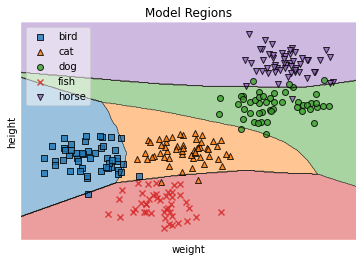

In [50]:
ax = plot_decision_regions(np.array(X_test), np.array(y_test), clf=model_no_ohe)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, class_names, framealpha=.5)
plt.title('Model Regions')
plt.xticks([])
plt.yticks([])
plt.xlabel('weight')
plt.ylabel('height')

### Algorithm Optimizer Gradient Descent

#### SGD momentum

In [52]:
model = Sequential()
model.add(Dense(100, activation='relu', input_shape=(2,)))
model.add(Dense(5, activation='softmax'))

In [54]:
opt = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)

In [82]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

- adam
- SGD
- RMSprop
- adadelta
- adaGrad

In [89]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1, validation_split=0.25)

Epoch 1/100
18/18 [==============================] - 0s 6ms/step - loss: 0.1177 - accuracy: 0.9644 - val_loss: 0.1220 - val_accuracy: 0.9468
Epoch 2/100
18/18 [==============================] - 0s 3ms/step - loss: 0.1181 - accuracy: 0.9680 - val_loss: 0.1168 - val_accuracy: 0.9628
Epoch 3/100
18/18 [==============================] - 0s 3ms/step - loss: 0.1182 - accuracy: 0.9662 - val_loss: 0.1186 - val_accuracy: 0.9628
Epoch 4/100
18/18 [==============================] - 0s 3ms/step - loss: 0.1170 - accuracy: 0.9609 - val_loss: 0.1174 - val_accuracy: 0.9574
Epoch 5/100
18/18 [==============================] - 0s 4ms/step - loss: 0.1201 - accuracy: 0.9609 - val_loss: 0.1193 - val_accuracy: 0.9628
Epoch 6/100
18/18 [==============================] - 0s 3ms/step - loss: 0.1177 - accuracy: 0.9626 - val_loss: 0.1168 - val_accuracy: 0.9574
Epoch 7/100
18/18 [==============================] - 0s 3ms/step - loss: 0.1210 - accuracy: 0.9626 - val_loss: 0.1165 - val_accuracy: 0.9628
Epoch 8/100
1

In [90]:
df_hist = pd.DataFrame(history.history)

Text(0.5, 1.0, 'Loss')

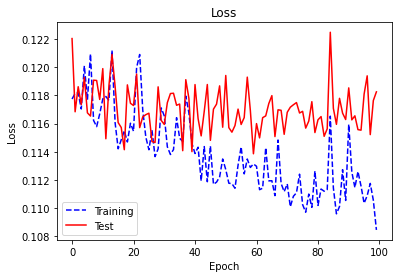

In [91]:
df_hist['loss'].plot(style='b--', label='Training')
df_hist['val_loss'].plot(style='r-', label='Test')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')